In [65]:
# imports added for stock time series analysis
import numpy as np
import pandas as pd
from pathlib import Path
%matplotlib inline

import warnings
warnings.simplefilter(action='ignore', category=Warning)

In [66]:
# display 2016_stock_data.csv as dataframe
stock_df = pd.read_csv(
    Path("2016_stock_data.csv"), index_col="date", infer_datetime_format=True, parse_dates=True)
stock_df.head()

,AMZN,AAPL,NFLX
date,,,
2016-04-04,593.190002,25.877037,104.349998
2016-04-05,586.140015,25.571972,104.940002
2016-04-06,602.080017,25.839775,104.830002
2016-04-07,591.429993,25.276215,104.449997
2016-04-08,594.599976,25.304159,103.809998


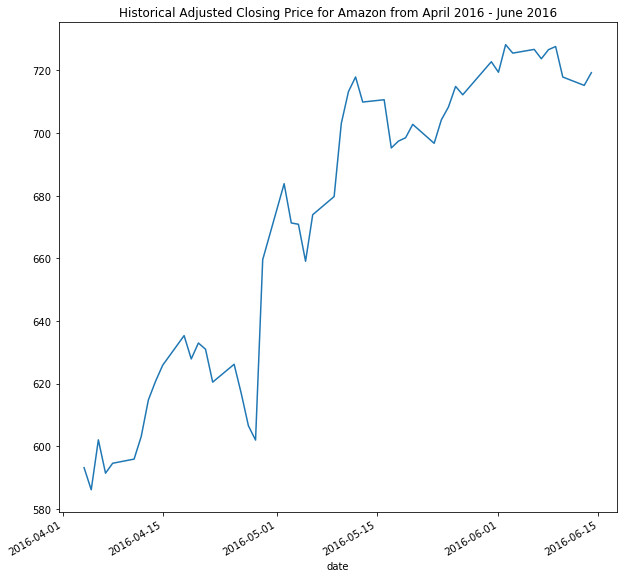

In [67]:
# plot historical adj close price for Amazon
AMZN_plot = stock_df.AMZN.plot(title="Historical Adjusted Closing Price for Amazon from April 2016 - June 2016", figsize=(10,10))

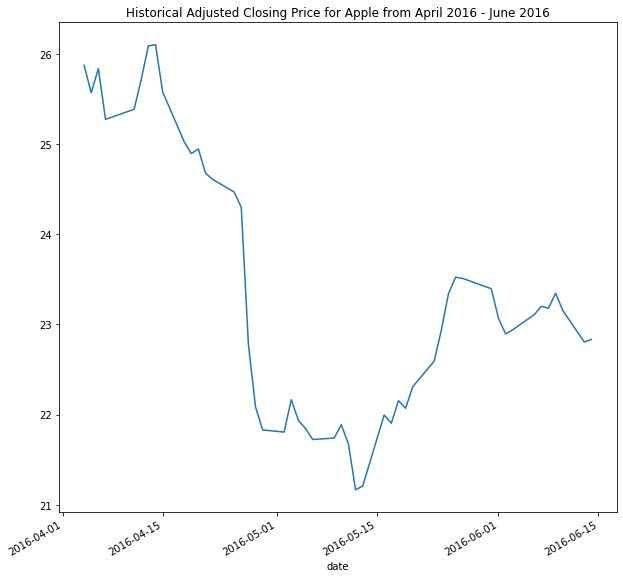

In [68]:
# plot historical adj close price for Apple
AAPL_plot = stock_df.AAPL.plot(title="Historical Adjusted Closing Price for Apple from April 2016 - June 2016", figsize=(10,10))

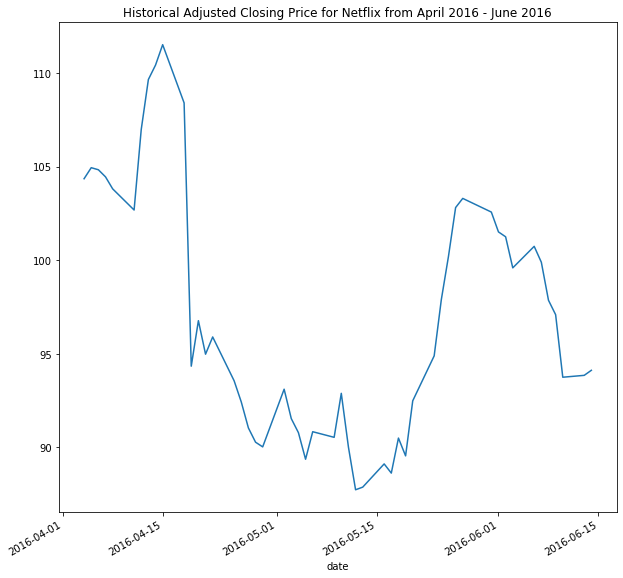

In [69]:
# plot historical adj close price for Netflix
NFLX_plot = stock_df.NFLX.plot(title="Historical Adjusted Closing Price for Netflix from April 2016 - June 2016", figsize=(10,10))

In [70]:
# use Hodrick-Prescott Filter, to decompose Amazon's adjusted close price into two separate series: trend and noise
import statsmodels.api as sm

amzn_noise, amzn_trend = sm.tsa.filters.hpfilter(stock_df["AMZN"])

In [71]:
# Create a dataframe for Amazon's adj close price, and add columns for "noise" and "trend" series from above:
amzn_df = stock_df.loc[:,["AMZN"]]
amzn_df["noise"] = amzn_noise
amzn_df["trend"] = amzn_trend
amzn_df.head()

,AMZN,noise,trend
date,,,
2016-04-04,593.190002,6.795550,586.394452
2016-04-05,586.140015,-3.529370,589.669385
2016-04-06,602.080017,9.131453,592.948565
2016-04-07,591.429993,-4.804040,596.234033
2016-04-08,594.599976,-4.933563,599.533538


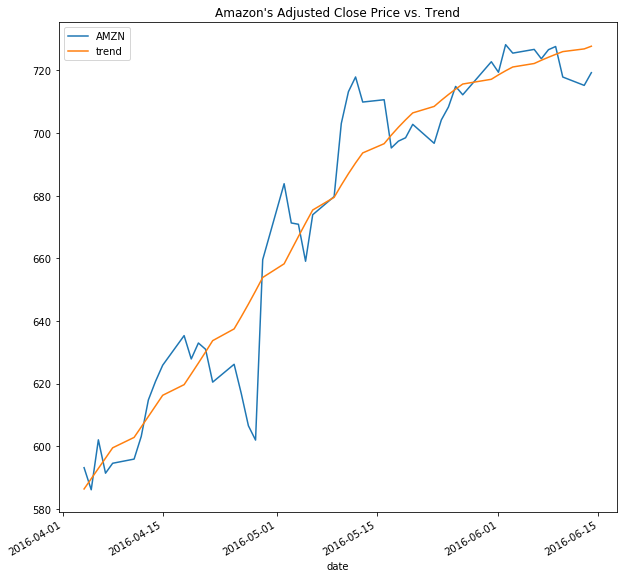

In [72]:
# Plot the adjusted close price vs. the trend for Amazon over the selected time series
amzn_df.plot(y = ["AMZN","trend"], title="Amazon's Adjusted Close Price vs. Trend", figsize=(10,10))

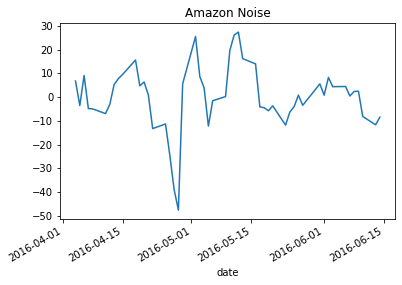

In [73]:
# plot the noise of Amazon
amzn_noise.plot(title="Amazon Noise")

In [74]:
# use Hodrick-Prescott Filter, to decompose Apple's adjusted close price into two separate series: trend and noise
aapl_noise, aapl_trend = sm.tsa.filters.hpfilter(stock_df["AAPL"])

In [75]:
# Create a dataframe for Apple's adj close price, and add columns for "noise" and "trend" series from above:
aapl_df = stock_df.loc[:,["AAPL"]]
aapl_df["noise"] = aapl_noise
aapl_df["trend"] = aapl_trend
aapl_df.head()

,AAPL,noise,trend
date,,,
2016-04-04,25.877037,-0.396133,26.273170
2016-04-05,25.571972,-0.550126,26.122098
2016-04-06,25.839775,-0.131004,25.970779
2016-04-07,25.276215,-0.542406,25.818620
2016-04-08,25.304159,-0.360791,25.664950


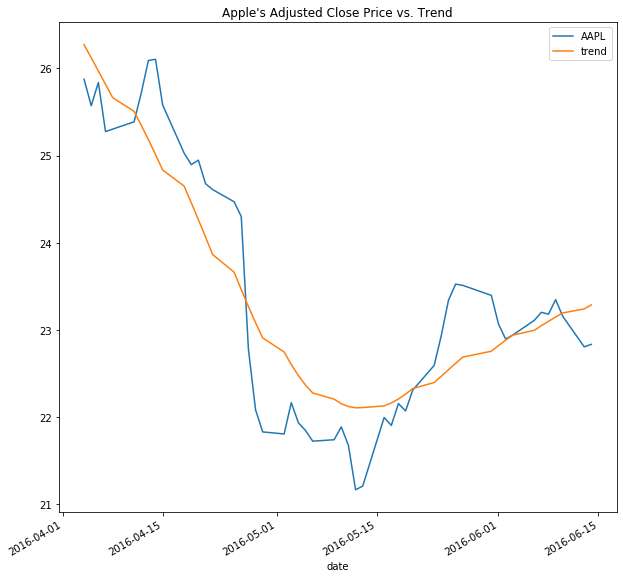

In [76]:
# Plot the adjusted close price vs. the trend for Amazon over the selected time series
aapl_df.plot(y = ["AAPL","trend"], title="Apple's Adjusted Close Price vs. Trend", figsize=(10,10))

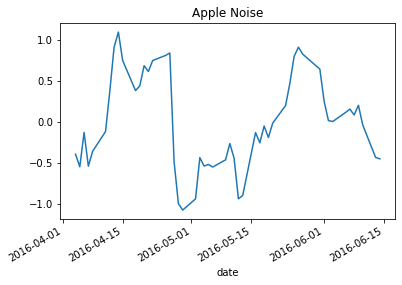

In [77]:
# plot the noise of Apple
aapl_noise.plot(title="Apple Noise")

In [78]:
# use Hodrick-Prescott Filter, to decompose Netflix's adjusted close price into two separate series: trend and noise
nflx_noise, nflx_trend = sm.tsa.filters.hpfilter(stock_df["NFLX"])

In [79]:
# Create a dataframe for Netflix's adj close price, and add columns for "noise" and "trend" series from above:
nflx_df = stock_df.loc[:,["NFLX"]]
nflx_df["noise"] = nflx_noise
nflx_df["trend"] = nflx_trend
nflx_df.head()

,NFLX,noise,trend
date,,,
2016-04-04,104.349998,-3.408431,107.758429
2016-04-05,104.940002,-2.117059,107.057061
2016-04-06,104.830002,-1.523562,106.353563
2016-04-07,104.449997,-1.194485,105.644482
2016-04-08,103.809998,-1.115413,104.925411


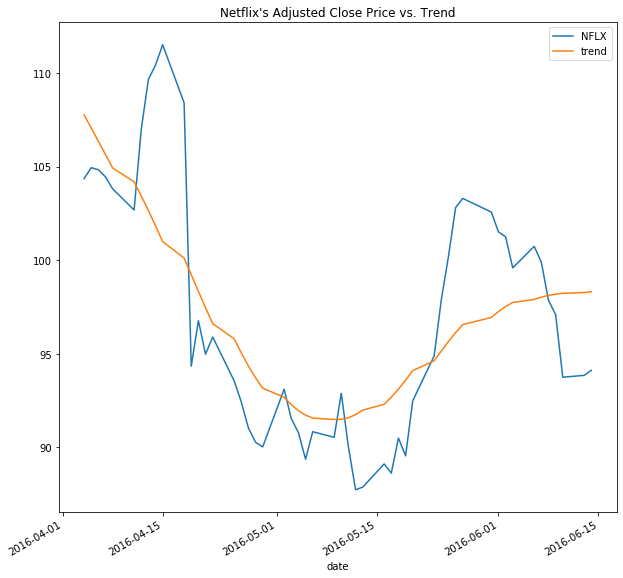

In [80]:
# Plot the adjusted close price vs. the trend for Amazon over the selected time series
nflx_df.plot(y = ["NFLX","trend"], title="Netflix's Adjusted Close Price vs. Trend", figsize=(10,10))

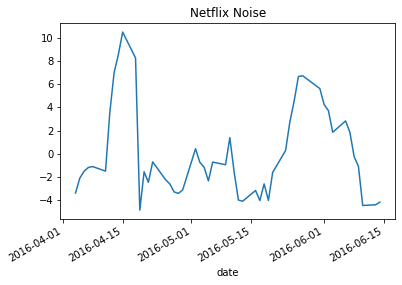

In [81]:
# plot the noise of Netflix
nflx_noise.plot(title="Netflix Noise")

In [82]:
# Forecasting Amazon's Returns using an ARMA Model
# Create a series using Amazon's adjusted close price percentage returns, drop any nan's, and check the results:
amzn_returns = (stock_df[["AMZN"]].pct_change() * 100)
amzn_returns = amzn_returns.replace(-np.inf, np.nan).dropna()
# normalize percent change return for predictive model by adding 100 to the percentage change and log of value
amzn_returns = amzn_returns + 100
amzn_returns = np.log(amzn_returns)
amzn_returns.tail()

,AMZN
date,
2016-06-08,4.609169
2016-06-09,4.606559
2016-06-10,4.591694
2016-06-13,4.601444
2016-06-14,4.610831


In [83]:
# import ARMA model
from statsmodels.tsa.arima_model import ARMA

# Estimate and ARMA model using statsmodels with order=(2, 1)
amzn_model = ARMA(amzn_returns.values, order=(2,1))

# Fit the Amazon model and assign it to a variable called amzn_results
amzn_results = amzn_model.fit()

In [84]:
# Output Amazon model summary results:
amzn_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                   50
Model:                     ARMA(2, 1)   Log Likelihood                 129.964
Method:                       css-mle   S.D. of innovations              0.018
Date:                Thu, 21 Jan 2021   AIC                           -249.929
Time:                        20:40:23   BIC                           -240.369
Sample:                             0   HQIC                          -246.288
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6090      0.003   1674.825      0.000       4.604       4.614
ar.L1.y       -0.9136        nan        nan        nan         nan         nan
ar.L2.y        0.0864        nan        nan        nan         nan         nan
ma.L1.y        0.9991        nan        nan        nan         nan         nan
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.0000           +0.0000j            1.0000            0.5000
AR.2           11.5786           +0.0000j           11.5786            0.0000
MA.1           -1.0009           +0.0000j            1.0009            0.5000
-----------------------------------------------------------------------------
"""

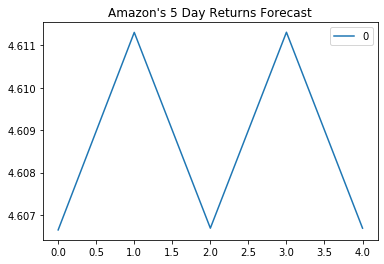

In [85]:
# Plot the 5 Day Returns Forecast for Amazon
pd.DataFrame(amzn_results.forecast(steps=5)[0]).plot(title="Amazon's 5 Day Returns Forecast")

In [86]:
# Forecasting Apple's Returns using an ARMA Model
# Create a series using Apple's adjusted close price percentage returns, drop any nan's, and check the results:
aapl_returns = (stock_df[["AAPL"]].pct_change() * 100)
aapl_returns = aapl_returns.replace(-np.inf, np.nan).dropna()
# normailize return data for ARMA model
aapl_returns = aapl_returns + 100
aapl_retusn = np.log(aapl_returns)
aapl_returns.tail()

,AAPL
date,
2016-06-08,99.909121
2016-06-09,100.717606
2016-06-10,99.177137
2016-06-13,98.492351
2016-06-14,100.123276


In [87]:
# Estimate and ARMA model using statsmodels with order=(2, 1)
aapl_model = ARMA(aapl_returns.values, order=(2,1))

# Fit the Apple model and assign it to a variable called aapl_results
aapl_results = aapl_model.fit()

In [88]:
# Output Apple model summary results:
aapl_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                   50
Model:                     ARMA(2, 1)   Log Likelihood                 -88.225
Method:                       css-mle   S.D. of innovations              1.411
Date:                Thu, 21 Jan 2021   AIC                            186.449
Time:                        20:42:13   BIC                            196.009
Sample:                             0   HQIC                           190.090
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         99.7566      0.292    341.384      0.000      99.184     100.329
ar.L1.y       -0.6766      0.135     -5.009      0.000      -0.941      -0.412
ar.L2.y        0.3234      0.141      2.290      0.022       0.047       0.600
ma.L1.y        1.0000        nan        nan        nan         nan         nan
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.0000           +0.0000j            1.0000            0.5000
AR.2            3.0920           +0.0000j            3.0920            0.0000
MA.1           -1.0000           +0.0000j            1.0000            0.5000
-----------------------------------------------------------------------------
"""

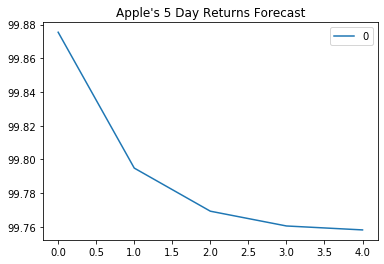

In [89]:
# Plot the 5 Day Returns Forecast for Apple
pd.DataFrame(aapl_results.forecast(steps=5)[0]).plot(title="Apple's 5 Day Returns Forecast")

In [90]:
# Forecasting Netflix's Returns using an ARMA Model
# Create a series using Netlix's adjusted close price percentage returns, drop any nan's, and check the results:
nflx_returns = (stock_df[["NFLX"]].pct_change() * 100)
nflx_returns = nflx_returns.replace(-np.inf, np.nan).dropna()
# normailize return data for ARMA model
nflx_returns = nflx_returns + 100
nflx_returns = np.log(nflx_returns)
nflx_returns.tail()

,NFLX
date,
2016-06-08,4.584639
2016-06-09,4.597271
2016-06-10,4.570164
2016-06-13,4.606236
2016-06-14,4.608043


In [91]:
# Estimate and ARMA model using statsmodels with order=(2, 1)
nflx_model = ARMA(nflx_returns.values, order=(2,1))

# Fit the Apple model and assign it to a variable called aapl_results
nflx_results = nflx_model.fit()

In [92]:
# Output Netflix model summary results:
nflx_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                   50
Model:                     ARMA(2, 1)   Log Likelihood                 111.618
Method:                       css-mle   S.D. of innovations              0.026
Date:                Thu, 21 Jan 2021   AIC                           -213.237
Time:                        20:43:21   BIC                           -203.676
Sample:                             0   HQIC                          -209.596
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6032      0.004   1068.661      0.000       4.595       4.612
ar.L1.y       -0.7961      0.167     -4.777      0.000      -1.123      -0.469
ar.L2.y        0.1742      0.142      1.224      0.221      -0.105       0.453
ma.L1.y        0.9174      0.110      8.358      0.000       0.702       1.133
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.0258           +0.0000j            1.0258            0.5000
AR.2            5.5973           +0.0000j            5.5973            0.0000
MA.1           -1.0900           +0.0000j            1.0900            0.5000
-----------------------------------------------------------------------------
"""

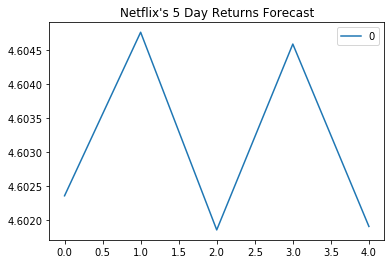

In [93]:
# Plot the 5 Day Returns Forecast for Netflix
pd.DataFrame(nflx_results.forecast(steps=5)[0]).plot(title="Netflix's 5 Day Returns Forecast")

In [94]:
# Forecasting the adj closing price using an ARIMA Model
from statsmodels.tsa.arima_model import ARIMA

# Estimate and ARIMA Model:
amzn_df2 = amzn_df["AMZN"]
amzn_df2.index = pd.DatetimeIndex(amzn_df2).to_period('D')
amzn_arima_model = ARIMA(amzn_df2, order=(5,1,1))

# Fit the model
amzn_arima_results = amzn_arima_model.fit()

In [95]:
# Output model summary results:
amzn_arima_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                 D.AMZN   No. Observations:                   50
Model:                 ARIMA(5, 1, 1)   Log Likelihood                -190.588
Method:                       css-mle   S.D. of innovations             10.698
Date:                Thu, 21 Jan 2021   AIC                            397.176
Time:                        20:44:47   BIC                            412.472
Sample:                    01-01-1970   HQIC                           403.001
                         - 01-01-1970                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            2.9368      0.394      7.459      0.000       2.165       3.708
ar.L1.D.AMZN     0.9442      0.142      6.644      0.000       0.666       1.223
ar.L2.D.AMZN    -0.1232      0.195     -0.633      0.527      -0.505       0.258
ar.L3.D.AMZN    -0.2092      0.199     -1.050      0.294      -0.600       0.181
ar.L4.D.AMZN     0.1936      0.200      0.969      0.333      -0.198       0.585
ar.L5.D.AMZN    -0.0357      0.147     -0.242      0.809      -0.324       0.253
ma.L1.D.AMZN    -1.0000      0.067    -15.003      0.000      -1.131      -0.869
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.6656           -0.0000j            1.6656           -0.5000
AR.2            1.3260           -0.0000j            1.3260           -0.0000
AR.3            0.8494           -1.5485j            1.7661           -0.1702
AR.4            0.8494           +1.5485j            1.7661            0.1702
AR.5            4.0685           -0.0000j            4.0685           -0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

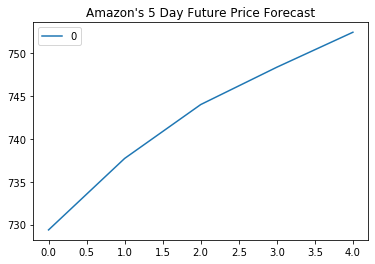

In [96]:
# Plot the 5 Day Price Forecast for Amazon
pd.DataFrame(amzn_arima_results.forecast(steps=5)[0]).plot(title="Amazon's 5 Day Future Price Forecast")

In [97]:
# Estimate and ARIMA Model:
aapl_df2 = aapl_df["AAPL"]
aapl_df2.index = pd.DatetimeIndex(aapl_df2).to_period('D')
aapl_arima_model = ARIMA(aapl_df2, order=(5,1,1))

# Fit the model
aapl_arima_results = aapl_arima_model.fit()

In [98]:
# Output model summary results:
aapl_arima_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                 D.AAPL   No. Observations:                   50
Model:                 ARIMA(5, 1, 1)   Log Likelihood                 -15.111
Method:                       css-mle   S.D. of innovations              0.327
Date:                Thu, 21 Jan 2021   AIC                             46.223
Time:                        20:45:16   BIC                             61.519
Sample:                    01-01-1970   HQIC                            52.047
                         - 01-01-1970                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0581      0.074     -0.782      0.434      -0.204       0.088
ar.L1.D.AAPL     0.8870      0.458      1.935      0.053      -0.012       1.785
ar.L2.D.AAPL    -0.1565      0.248     -0.631      0.528      -0.643       0.330
ar.L3.D.AAPL    -0.1575      0.208     -0.757      0.449      -0.565       0.250
ar.L4.D.AAPL     0.0962      0.224      0.430      0.667      -0.342       0.535
ar.L5.D.AAPL     0.0730      0.160      0.456      0.648      -0.240       0.386
ma.L1.D.AAPL    -0.5698      0.440     -1.296      0.195      -1.432       0.292
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.2397           -0.0000j            1.2397           -0.0000
AR.2            0.7951           -1.1497j            1.3979           -0.1537
AR.3            0.7951           +1.1497j            1.3979            0.1537
AR.4           -2.0743           -1.1635j            2.3783           -0.4186
AR.5           -2.0743           +1.1635j            2.3783            0.4186
MA.1            1.7550           +0.0000j            1.7550            0.0000
-----------------------------------------------------------------------------
"""

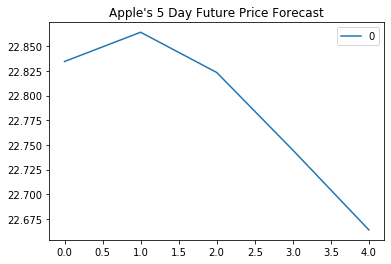

In [99]:
# Plot the 5 Day Price Forecast for Apple
pd.DataFrame(aapl_arima_results.forecast(steps=5)[0]).plot(title="Apple's 5 Day Future Price Forecast")

In [100]:
# Estimate and ARIMA Model:
nflx_df2 = nflx_df["NFLX"]
nflx_df2.index = pd.DatetimeIndex(nflx_df2).to_period('D')
nflx_arima_model = ARIMA(nflx_df2, order=(5,1,1))

# Fit the model
nflx_arima_results = nflx_arima_model.fit()

In [101]:
# Output model summary results:
nflx_arima_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                 D.NFLX   No. Observations:                   50
Model:                 ARIMA(5, 1, 1)   Log Likelihood                -119.186
Method:                       css-mle   S.D. of innovations              2.622
Date:                Thu, 21 Jan 2021   AIC                            254.371
Time:                        20:45:56   BIC                            269.668
Sample:                    01-01-1970   HQIC                           260.196
                         - 01-01-1970                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.1930      0.390     -0.495      0.621      -0.957       0.571
ar.L1.D.NFLX    -0.9155      0.139     -6.573      0.000      -1.188      -0.643
ar.L2.D.NFLX     0.1867      0.189      0.987      0.324      -0.184       0.557
ar.L3.D.NFLX     0.0002      0.192      0.001      0.999      -0.377       0.377
ar.L4.D.NFLX    -0.1424      0.189     -0.755      0.450      -0.512       0.227
ar.L5.D.NFLX    -0.0402      0.146     -0.276      0.783      -0.326       0.245
ma.L1.D.NFLX     1.0000        nan        nan        nan         nan         nan
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.0004           -0.0000j            1.0004           -0.5000
AR.2            1.2973           -1.2899j            1.8294           -0.1245
AR.3            1.2973           +1.2899j            1.8294            0.1245
AR.4           -2.5705           -0.9116j            2.7274           -0.4458
AR.5           -2.5705           +0.9116j            2.7274            0.4458
MA.1           -1.0000           +0.0000j            1.0000            0.5000
-----------------------------------------------------------------------------
"""

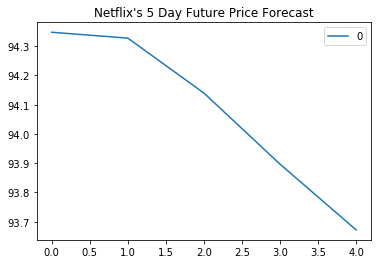

In [102]:
# Plot the 5 Day Price Forecast for Netflix
pd.DataFrame(nflx_arima_results.forecast(steps=5)[0]).plot(title="Netflix's 5 Day Future Price Forecast")

In [103]:
# Volatility Forecasting with GARCH to forecast near-term volatility
from arch import arch_model

In [104]:
# Estimate a GARCH model:
amzn_garch_model = arch_model(amzn_returns, mean="Zero", vol="GARCH", p=2,q=1)
# Fit the model
amzn_garch_results = amzn_garch_model.fit()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 147.34902500686118
Optimization terminated successfully    (Exit mode 0)
            Current function value: 147.34813781533614
            Iterations: 1
            Function evaluations: 9
            Gradient evaluations: 1


In [105]:
# Summarize the model results
amzn_garch_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                       Zero Mean - GARCH Model Results                        
==============================================================================
Dep. Variable:                   AMZN   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.020
Vol Model:                      GARCH   Log-Likelihood:               -147.348
Distribution:                  Normal   AIC:                           302.696
Method:            Maximum Likelihood   BIC:                           310.344
                                        No. Observations:                   50
Date:                Thu, Jan 21 2021   Df Residuals:                       46
Time:                        20:46:27   Df Model:                            4
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega         10.6217     11.082      0.958      0.338 [-11.098, 32.342]
alpha[1]   5.0055e-03      0.125  4.007e-02      0.968 [ -0.240,  0.250]
alpha[2]   5.0045e-03      0.161  3.100e-02      0.975 [ -0.311,  0.321]
beta[1]        0.4900      0.535      0.916      0.360 [ -0.559,  1.539]
========================================================================

Covariance estimator: robust
"""

In [106]:
# Find the last day of the dataset
amzn_last_day = amzn_returns.index.max().strftime('%Y-%m-%d')
amzn_last_day

'2016-06-14'

In [107]:
# Create a 5 day forecast of volatility of Amazon
forecast_horizon = 5

# Start the forecast using the amzn_last_day calculated above
amzn_forecasts = amzn_garch_results.forecast(start=amzn_last_day, horizon=forecast_horizon)
amzn_forecasts

In [108]:
# Annualize the forecast
amzn_intermediate = np.sqrt(amzn_forecasts.variance.dropna() * 252)
amzn_intermediate.head()

,h.1,h.2,h.3,h.4,h.5
date,,,,,
2016-06-14,73.165816,73.166924,73.167329,73.167534,73.167638


In [109]:
# Transpose the forecast so that it is easier to plot
amzn_final = amzn_intermediate.dropna().T
amzn_final.head()

date,2016-06-14
h.1,73.165816
h.2,73.166924
h.3,73.167329
h.4,73.167534
h.5,73.167638


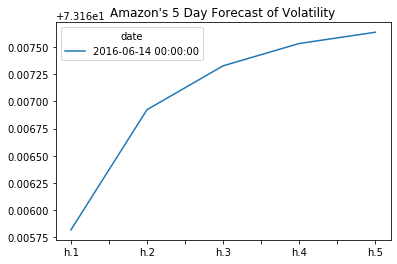

In [110]:
# Plot the final forecast
amzn_final.plot(title="Amazon's 5 Day Forecast of Volatility")

In [111]:
# Estimate a GARCH model:
aapl_garch_model = arch_model(aapl_returns, mean="Zero", vol="GARCH", p=2,q=1)
# Fit the model
aapl_garch_results = aapl_garch_model.fit()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 301.0922735453453
Optimization terminated successfully    (Exit mode 0)
            Current function value: 301.09121830783005
            Iterations: 1
            Function evaluations: 8
            Gradient evaluations: 1


In [112]:
# Summarize the model results
aapl_garch_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                       Zero Mean - GARCH Model Results                        
==============================================================================
Dep. Variable:                   AAPL   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.020
Vol Model:                      GARCH   Log-Likelihood:               -301.091
Distribution:                  Normal   AIC:                           610.182
Method:            Maximum Likelihood   BIC:                           617.831
                                        No. Observations:                   50
Date:                Thu, Jan 21 2021   Df Residuals:                       46
Time:                        20:47:43   Df Model:                            4
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega       4977.2881   3451.096      1.442      0.149 [-1.787e+03,1.174e+04]
alpha[1]       0.1001      0.142      0.704      0.482      [ -0.179,  0.379]
alpha[2]       0.1000      0.172      0.582      0.561      [ -0.237,  0.437]
beta[1]        0.3000      0.405      0.741      0.459      [ -0.494,  1.094]
=============================================================================

Covariance estimator: robust
"""

In [113]:
# Find the last day of the dataset
aapl_last_day = aapl_returns.index.max().strftime('%Y-%m-%d')
aapl_last_day

'2016-06-14'

In [114]:
# Create a 5 day forecast of volatility of Apple
# Start the forecast using the aapl_last_day calculated above
aapl_forecasts = aapl_garch_results.forecast(start=aapl_last_day, horizon=forecast_horizon)
aapl_forecasts

In [115]:
# Annualize the forecast
aapl_intermediate = np.sqrt(aapl_forecasts.variance.dropna() * 252)
aapl_intermediate.head()

,h.1,h.2,h.3,h.4,h.5
date,,,,,
2016-06-14,1581.729684,1583.642006,1583.638095,1583.827606,1583.903037


In [116]:
# Transpose the forecast so that it is easier to plot
aapl_final = aapl_intermediate.dropna().T
aapl_final.head()

date,2016-06-14
h.1,1581.729684
h.2,1583.642006
h.3,1583.638095
h.4,1583.827606
h.5,1583.903037


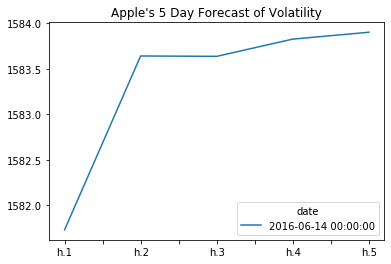

In [117]:
# Plot the final forecast
aapl_final.plot(title="Apple's 5 Day Forecast of Volatility")

In [118]:
# Estimate a GARCH model:
nflx_garch_model = arch_model(nflx_returns, mean="Zero", vol="GARCH", p=2,q=1)
# Fit the model
nflx_garch_results = nflx_garch_model.fit()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 147.28467995770987
Optimization terminated successfully    (Exit mode 0)
            Current function value: 147.28433534057154
            Iterations: 1
            Function evaluations: 9
            Gradient evaluations: 1


In [119]:
# Summarize the model results
nflx_garch_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                       Zero Mean - GARCH Model Results                        
==============================================================================
Dep. Variable:                   NFLX   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.020
Vol Model:                      GARCH   Log-Likelihood:               -147.284
Distribution:                  Normal   AIC:                           302.569
Method:            Maximum Likelihood   BIC:                           310.217
                                        No. Observations:                   50
Date:                Thu, Jan 21 2021   Df Residuals:                       46
Time:                        20:48:15   Df Model:                            4
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega         10.5947     17.859      0.593      0.553 [-24.408, 45.597]
alpha[1]       0.0500      0.174      0.287      0.774 [ -0.291,  0.391]
alpha[2]       0.0500      0.218      0.230      0.818 [ -0.377,  0.477]
beta[1]        0.4000      0.957      0.418      0.676 [ -1.476,  2.276]
========================================================================

Covariance estimator: robust
"""

In [120]:
# Find the last day of the dataset
nflx_last_day = nflx_returns.index.max().strftime('%Y-%m-%d')
nflx_last_day

'2016-06-14'

In [121]:
# Create a 5 day forecast of volatility of Netflix
# Start the forecast using the nflx_last_day calculated above
nflx_forecasts = nflx_garch_results.forecast(start=nflx_last_day, horizon=forecast_horizon)
nflx_forecasts

In [122]:
# Annualize the forecast
nflx_intermediate = np.sqrt(nflx_forecasts.variance.dropna() * 252)
nflx_intermediate.head()

,h.1,h.2,h.3,h.4,h.5
date,,,,,
2016-06-14,73.062493,73.071718,73.071471,73.071821,73.071966


In [123]:
# Transpose the forecast so that it is easier to plot
nflx_final = nflx_intermediate.dropna().T
nflx_final.head()

date,2016-06-14
h.1,73.062493
h.2,73.071718
h.3,73.071471
h.4,73.071821
h.5,73.071966


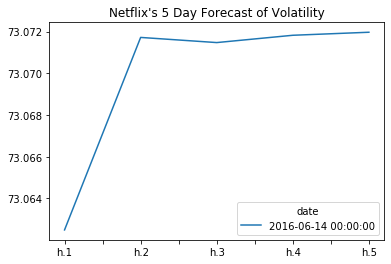

In [124]:
# Plot the final forecast
nflx_final.plot(title="Netflix's 5 Day Forecast of Volatility")